# Nathan's DS 219 HW 7 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from ucimlrepo import fetch_ucirepo
import seaborn as sns
  
#import math csv 
df = pd.read_csv("C:/Users/natha/Downloads/student-mat.csv", delimiter=';')

# making sure the data set is clean 
df = df.dropna()

#only focusing on G1,G2,G3
df = df.iloc[:,-3:]

# Display the first few rows of the dataset
df.head()

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


In [2]:
# Exploratory Data Analysis (EDA)

# Explore the dataset's structure and summary statistics

print(df.dtypes)
df.describe()

G1    int64
G2    int64
G3    int64
dtype: object


,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


# Data visualization

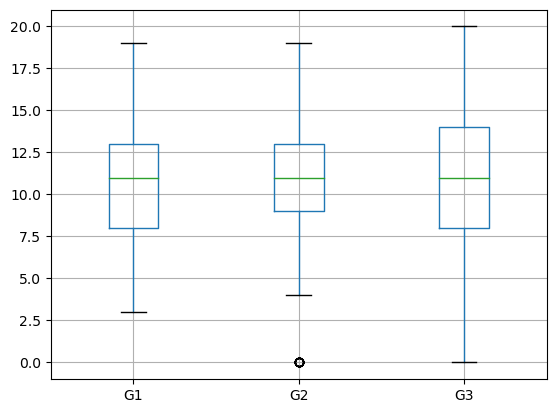

In [3]:
# Boxplots for each grade to identify outliers
df.boxplot(column=['G1', 'G2', 'G3'])
plt.show()

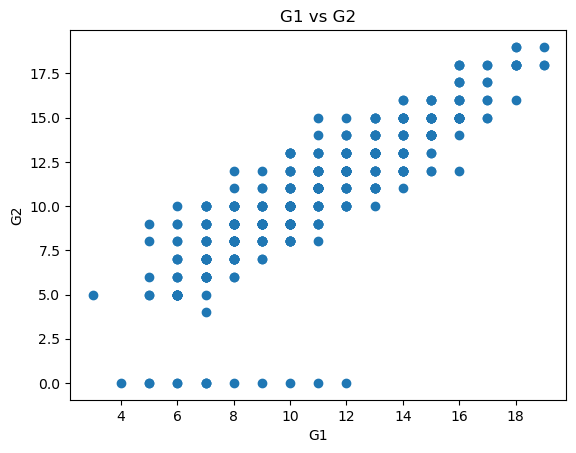

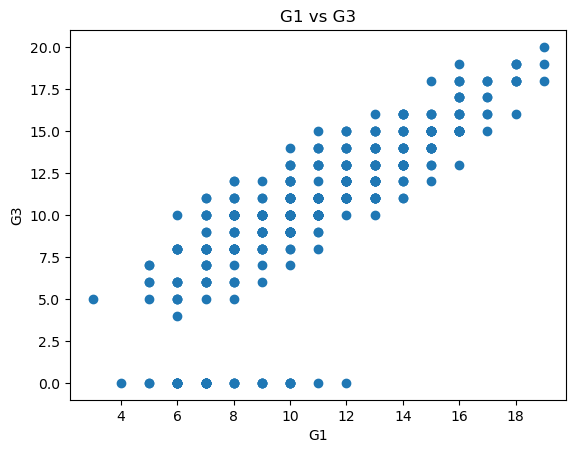

In [4]:
# Scatter plots to visualize potential relationships between grades
plt.scatter(df['G1'], df['G2'])
plt.title('G1 vs G2')
plt.xlabel('G1')
plt.ylabel('G2')
plt.show()

plt.scatter(df['G1'], df['G3'])
plt.title('G1 vs G3')
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()


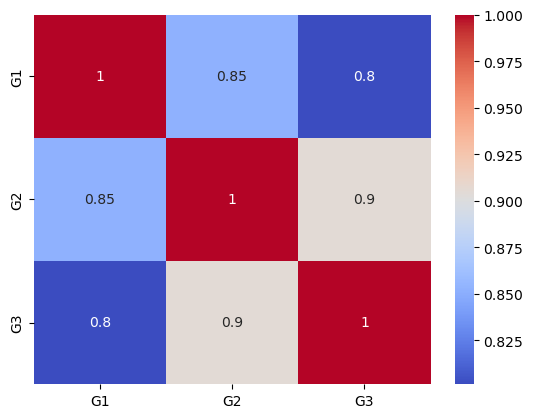

In [5]:
# Correlation matrix heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Hypothesis Formulation
## Based on the visualizations, we can formulate the following hypotheses:
There is a relationship between G1 and G2 grades 

There is a relationship between G1 and G3 grades

There is a relationship between G2 and G3 grades

## We first assume those are false,

i.e. There is no relationship between **G1 and G2** or  **G1 and G3** or **G2 and G3**

and we are going to find evidence to prove them true


In [6]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation
correlation_coefficient, p_value = pearsonr(df['G1'], df['G2'])

# Print the results
print(f"Pearson's correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Decision: Check if we reject the null hypothesis or not
if p_value < 0.05:
    print("We reject the null hypothesis. There is evidence of a linear relationship between G1 and G2.")
else:
    print("We do not reject the null hypothesis. There is no evidence of a linear relationship between G1 and G2.")


Pearson's correlation coefficient: 0.8521180663648062
P-value: 1.4413466854282613e-112
We reject the null hypothesis. There is evidence of a linear relationship between G1 and G2.


In [7]:
# Calculate Pearson's correlation
correlation_coefficient, p_value = pearsonr(df['G1'], df['G3'])

# Print the results
print(f"Pearson's correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Decision: Check if we reject the null hypothesis or not
if p_value < 0.05:
    print("We reject the null hypothesis. There is evidence of a linear relationship between G1 and G3.")
else:
    print("We do not reject the null hypothesis. There is no evidence of a linear relationship between G1 and G3.")


Pearson's correlation coefficient: 0.8014679320174141
P-value: 9.001430312277354e-90
We reject the null hypothesis. There is evidence of a linear relationship between G1 and G3.


In [8]:
# Calculate Pearson's correlation
correlation_coefficient, p_value = pearsonr(df['G2'], df['G3'])

# Print the results
print(f"Pearson's correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Decision: Check if we reject the null hypothesis or not
if p_value < 0.05:
    print("We reject the null hypothesis. There is evidence of a linear relationship between G2 and G3.")
else:
    print("We do not reject the null hypothesis. There is no evidence of a linear relationship between G2 and G3.")


Pearson's correlation coefficient: 0.9048679892693011
P-value: 7.625719154047083e-148
We reject the null hypothesis. There is evidence of a linear relationship between G2 and G3.


# Documentation and Reporting

## Analysis Process

### Data Preparation
The data was initially loaded into a pandas DataFrame, after which we performed preliminary explorations to understand its structure and to ensure that the data was clean and suitable for analysis.

### Correlation Hypothesis Tests
We conducted Pearson's correlation tests to examine the relationships between the three sets of grades: G1 with G2, G2 with G3, and G1 with G3. Our goal was to determine whether there was a linear relationship between these pairs of grades.

#### Test Implementation
For each pair of grades, we calculated the Pearson correlation coefficient and the associated p-value. The hypotheses for each test were defined as follows:

- Null hypothesis (H0): There is no  correlation between the grades (the correlation coefficient is less than or equal to zero).
- Alternative hypothesis (H1): There is a correlation between the grades (the correlation coefficient is greater than zero).

We selected a significance level of 0.05 for our tests. Here is the generic code used for each pair:

```python
correlation_coefficient, p_value = pearsonr(df['Grade1'], df['Grade2'])

if p_value < 0.05 and correlation_coefficient > 0:
    print("Reject H0: There is evidence of a positive linear relationship.")
else:
    print("Fail to reject H0: There is no evidence of a positive linear relationship.")


# Key Findings and Conclusion
The analysis supports the conclusion that students' performance is consistently related across all three grade evaluations.

Specifically, there is a statistically **significant linear relationship** between **G1 and G2**, **G2 and G3**, and **G1 and G3** grades. This suggests that performance in earlier evaluations is indicative of later performance.

# Extra Credit 

This part should be satisfied by my previous submission, right?